In [1]:
import os
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from RoadDataset import RoadDataset
from MultiRoadDataset import MultiRoadDataset

In [2]:
train_datasets_path = "../notebooks/datasets/train/"
sub_dirs = os.listdir(train_datasets_path)
train_dataset_paths = [[train_datasets_path + sub_dir + "/" + sub_dir + ".csv", train_datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
train_dataset_paths

[['../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/frames/'],
 ['../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv',
  '../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/frames/'],
 ['../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv',
  '../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/frames/'],
 ['../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv',
  '../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 

In [3]:
column_names = ['filename','steering_wheel_angle','speed', 'blink_l', 'blink_r']
my_batch_size = 16
multi_train_dataset = MultiRoadDataset(column_names, batch_size=my_batch_size)

for train_dataset_path in train_dataset_paths:
    multi_train_dataset.addRoadDataset(train_dataset_path[0], train_dataset_path[1])
    

Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv
Loaded dataset with 8096 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv
Loaded dataset with 3775 samples
Reading csv file: ../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv
Failed to read csv file!
Loaded dataset with 0 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv
Loaded dataset with 7060 samples
Reading csv file: ../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv
Loaded dataset with 3112 samples
Reading csv file: ../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv
Loaded dataset with 17985 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 2020.csv
Loaded dataset with 2793 samples
Reading csv file: ../notebooks/datasets/train/

# SWA vs speed:

In [4]:
multi_train_dataset.clean()

Cleaning dataset. Starting with 8096 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 984 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 1292 rows for reason: Low speed (< 25 km/h)
Removing 125 rows for reason: Left blinker on
Removing 1 rows for reason: Right blinker on
5694 samples remaining.
Cleaning dataset. Starting with 3775 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 905 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 616 rows for reason: Low speed (< 25 km/h)
Removing 65 rows for reason: Left blinker on
Removing 138 rows for reason: Right blinker on
2051 samples remaining.
Cleaning dataset. Starting with 0 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 0 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 0 rows for reas

/tf/notebooks/Autopilot/diypilot/notebooks/RoadDataset.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['filename'] = csv['filename'].shift(self.latency_compensation_frames, fill_value = "No frame")
/tf/notebooks/Autopilot/diypilot/notebooks/RoadDataset.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['filename'] = csv['filename'].shift(self.latency_compensation_frames, fill_value = "No frame")


Removing 1004 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 98 rows for reason: Low speed (< 25 km/h)
Removing 51 rows for reason: Left blinker on
Removing 47 rows for reason: Right blinker on
10225 samples remaining.
Cleaning dataset. Starting with 19762 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 1649 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 487 rows for reason: Low speed (< 25 km/h)
Removing 179 rows for reason: Left blinker on
Removing 12 rows for reason: Right blinker on
17435 samples remaining.
Cleaning dataset. Starting with 6631 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 760 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 454 rows for reason: Low speed (< 25 km/h)
Removing 21 rows for reason: Left blinker on
Removing 44 rows for reason: Right blinker on
5352 samples remaining.
Cl

/tf/notebooks/Autopilot/diypilot/notebooks/RoadDataset.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['filename'] = csv['filename'].shift(self.latency_compensation_frames, fill_value = "No frame")


Removing 369 rows for reason: Low speed (< 25 km/h)
Removing 2 rows for reason: Left blinker on
Removing 32 rows for reason: Right blinker on
4232 samples remaining.
Cleaning dataset. Starting with 10289 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 1055 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 1772 rows for reason: Low speed (< 25 km/h)
Removing 14 rows for reason: Left blinker on
Removing 65 rows for reason: Right blinker on
7383 samples remaining.
Cleaning dataset. Starting with 38239 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 2413 rows for reason: High SWA (> +45.0/ < -45.0 deg)
Removing 2190 rows for reason: Low speed (< 25 km/h)
Removing 282 rows for reason: Left blinker on
Removing 311 rows for reason: Right blinker on
33043 samples remaining.
Cleaning dataset. Starting with 8994 samples.
Removing 0 rows

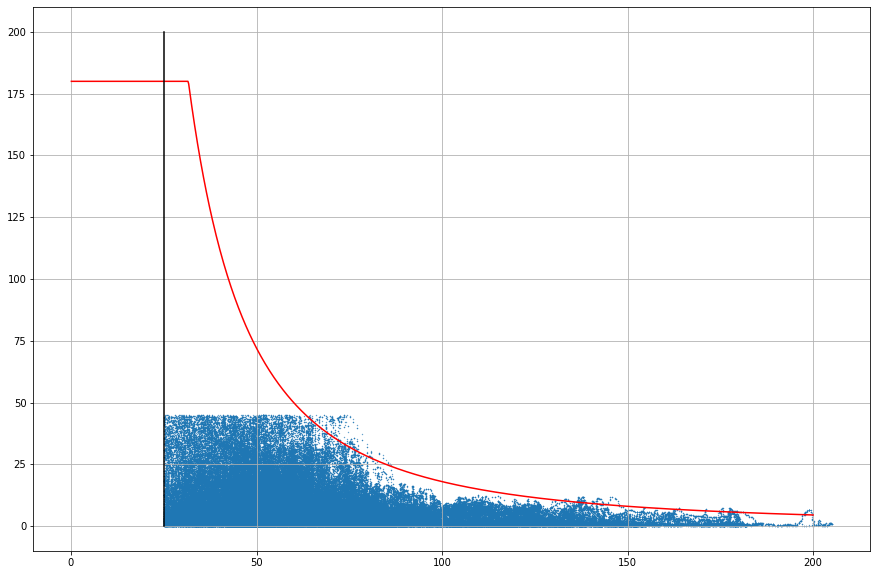

In [5]:
swas = multi_train_dataset.get_csv()['steering_wheel_angle']
speeds = multi_train_dataset.get_csv()['speed']

#remove -999 dummy speed value
no_speeds_indices = speeds[speeds < 0].index
speeds = speeds.drop(no_speeds_indices)
swas = swas.drop(no_speeds_indices)
swas = abs(swas)


from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.grid(True)
plt.scatter(x=speeds, y=swas, s=.1)

vel = np.linspace(0.1, 200, 1000)
envelope = 180000/(vel**2)
envelope = np.clip(envelope, 0, 180)

plt.plot(vel, envelope, color='red')

plt.plot([25,25], [0,200], color='black')

#plt.ylim(0, 50)
plt.show()

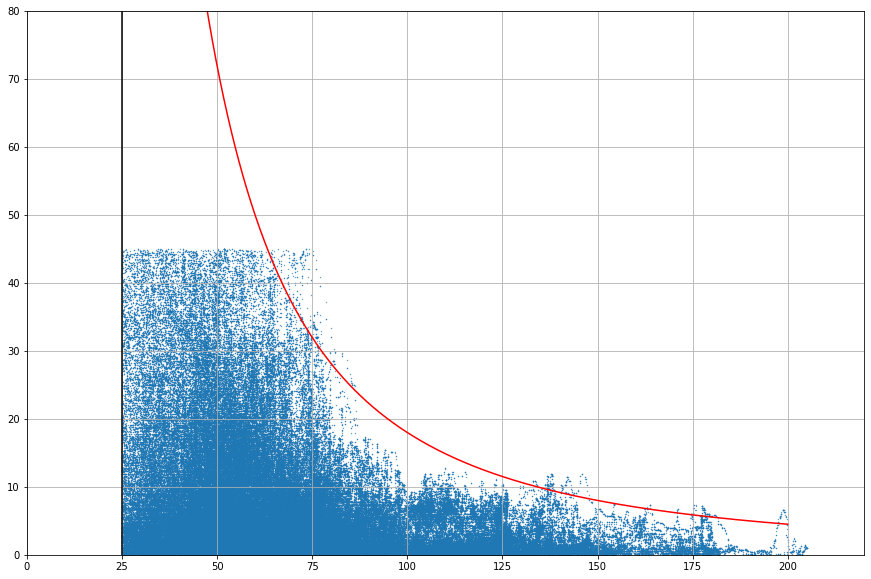

In [6]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.scatter(x=speeds, y=swas, s=.1)

plt.plot(vel, envelope, color='red')
plt.plot([25,25], [0,500], color='black')
plt.xlim(0, 220)
plt.ylim(0, 80)
plt.show()

# Steering wheel speed vs vehicle speed

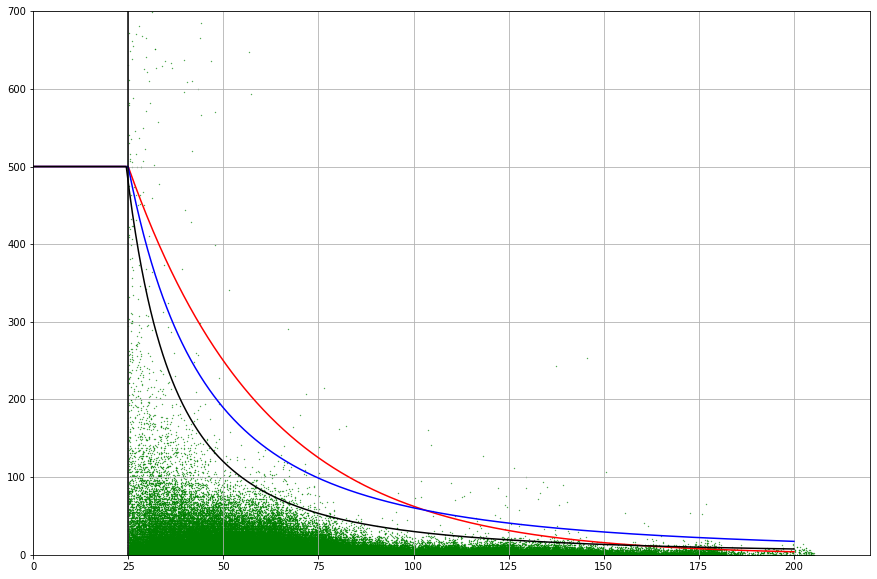

In [7]:
swas = multi_train_dataset.get_csv()['steering_wheel_angle']
steering_wheel_speed = swas.diff()
framerate = 15
steering_wheel_speed *= framerate
speeds = multi_train_dataset.get_csv()['speed']

swas

#remove -999 dummy speed value
no_speeds_indices = speeds[speeds < 0].index
#speeds = speeds.drop(no_speeds_indices)
#steering_wheel_speed = steering_wheel_speed.drop(no_speeds_indices)


steering_wheel_speed = abs(steering_wheel_speed)


plt.figure(figsize=(15,10))
plt.grid(True)

plt.scatter(x=speeds, y=steering_wheel_speed, s=.1, color='green')

vel = np.linspace(0.1, 200, 1000)
envelope = 1000/(2**(vel/25))
envelope2 = 800000/((vel+15)**2)
envelope3 = 300000/(vel**2)

envelope = np.clip(envelope, 0, 500)
envelope2 = np.clip(envelope2, 0, 500)
envelope3 = np.clip(envelope3, 0, 500)

plt.plot(vel, envelope, color='red')
plt.plot(vel, envelope2, color='blue')
plt.plot(vel, envelope3, color='black')

plt.plot([25,25], [0,700], color='black')

plt.xlim(0, 220)
plt.ylim(0, 700)
plt.show()

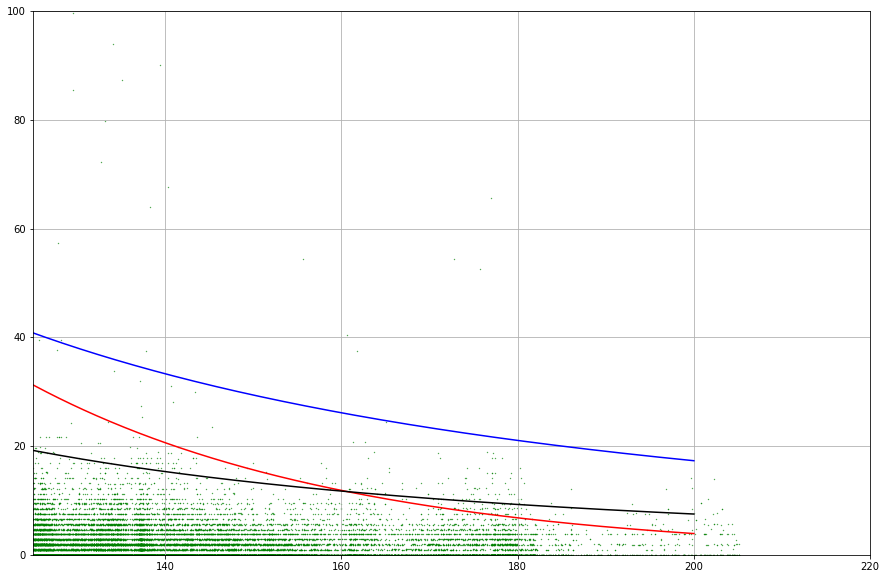

In [8]:
plt.figure(figsize=(15,10))
plt.grid(True)

plt.scatter(x=speeds, y=steering_wheel_speed, s=.1, color='green')

plt.plot(vel, envelope, color='red')
plt.plot(vel, envelope2, color='blue')
plt.plot(vel, envelope3, color='black')

plt.xlim(125, 220)
plt.ylim(0, 100)
plt.show()

In [9]:
multi_train_dataset.balance()

Balancing dataset (step 1). Starting with 5694 samples (Std. dev: 12.88275384555444)
1175 samples remaining after Balancing step 1 (Std. dev: 22.38238419753099)
Balancing dataset (step 2). Starting with 1175 samples
Mean: -1.8223914893617017)
1070 samples remaining after Balancing step 2
Mean: 0.12735514018691607)

Balancing dataset (step 1). Starting with 2051 samples (Std. dev: 18.48305125715824)
495 samples remaining after Balancing step 1 (Std. dev: 25.32961743973449)
Balancing dataset (step 2). Starting with 495 samples
Mean: 0.7234747474747478)
456 samples remaining after Balancing step 2
Mean: -0.056776315789473154)

Balancing dataset (step 1). Starting with 5474 samples (Std. dev: 13.335803999075434)
1170 samples remaining after Balancing step 1 (Std. dev: 22.531749964257607)
Balancing dataset (step 2). Starting with 1170 samples
Mean: 0.2449658119658117)
1122 samples remaining after Balancing step 2
Mean: -0.03925133689839549)

Balancing dataset (step 1). Starting with 201 sam

1367 samples remaining after Balancing step 1 (Std. dev: 20.80270213739676)
Balancing dataset (step 2). Starting with 1367 samples
Mean: 1.184455010972933)
1270 samples remaining after Balancing step 2
Mean: 0.07438582677165356)

Balancing dataset (step 1). Starting with 33043 samples (Std. dev: 9.26617679898057)
5531 samples remaining after Balancing step 1 (Std. dev: 19.648397057453135)
Balancing dataset (step 2). Starting with 5531 samples
Mean: -0.15747423612366623)
5168 samples remaining after Balancing step 2
Mean: -0.09636803405572746)

Balancing dataset (step 1). Starting with 1535 samples (Std. dev: 12.759814350354578)
290 samples remaining after Balancing step 1 (Std. dev: 20.432866641086214)
Balancing dataset (step 2). Starting with 290 samples
Mean: 2.754000000000001)
240 samples remaining after Balancing step 2
Mean: 0.54525)

Balancing dataset (step 1). Starting with 18663 samples (Std. dev: 9.74771048765237)
3328 samples remaining after Balancing step 1 (Std. dev: 20.675

# SWA distribution:

In [10]:
# get a decent amount of samples
swas_non_augmented = []
swas_augmented = []
swas_augmented_normalized = []

sample_count = multi_train_dataset.get_batch_size()*len(multi_train_dataset)-1

for i in range(1000):
    
    sample_idx = random.randint(0, sample_count)
    
    sample = multi_train_dataset.get_sample(sample_idx, augment=False, crop=True, normalize=False)
    actual_swa = sample['swa']
    swas_non_augmented.append(actual_swa)
    
    sample = multi_train_dataset.get_sample(sample_idx, augment=True, crop=True, normalize=False)
    actual_swa = sample['swa']
    swas_augmented.append(actual_swa)
    
    sample = multi_train_dataset.get_sample(sample_idx, augment=True, crop=True, normalize=True)
    actual_swa = sample['swa']
    swas_augmented_normalized.append(actual_swa)

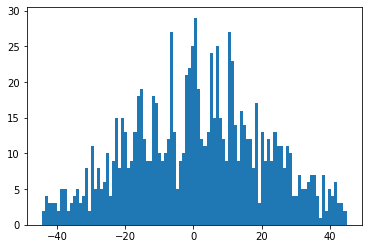

In [11]:
plt.hist(swas_non_augmented, bins=100)
plt.show()

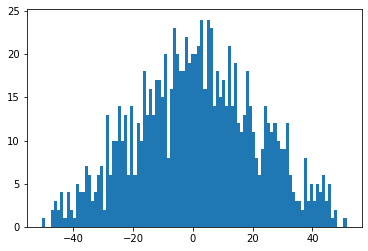

In [12]:
plt.hist(swas_augmented, bins=100)
plt.show()

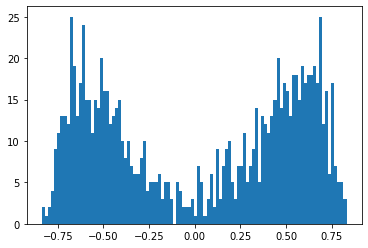

In [13]:
plt.hist(swas_augmented_normalized, bins=100)
plt.show()